<a href="https://colab.research.google.com/github/Yogender-Singh/Notebooks/blob/main/yolov5_custom_data_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone YOLOv5 Repository and Install Requirements

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5/
!pip install -r requirements.txt -qq

Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 25.87 MiB/s, done.
Resolving deltas: 100% (10742/10742), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 18.6 MB/s eta 0:00:00


### Download Dataset

In [2]:
%cd ..
!mkdir vehicles_open_image
%cd vehicles_open_image
!curl -L -s "https://public.roboflow.com/ds/2Tb6yXY8l8?key=Eg82WpxUEr" > vehicles.zip
!unzip -q vehicles.zip
!rm vehicles.zip

/content
/content/vehicles_open_image


### Import Packages

In [3]:
import yaml
import os
import glob
from IPython.display import Image, display

### Create Data Configuration

In [4]:
config = {
    "path": "/content/vehicles_open_image",
    "train": "/content/vehicles_open_image/train",
    "val": "/content/vehicles_open_image/valid",
    "nc": 5,
    "names": ["Ambulance", "Bus", "Car", "Motorcycle", "Truck"]
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

%cd /content/yolov5

/content/yolov5


### Define Hyperparameters for the Model

In [5]:
SIZE = 640
BATCH_SIZE = 32
EPOCHS = 20
MODEL = "yolov5s"
WORKERS = 1
PROJECT = "parking_lot"
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}_small"

### Training with all layers

In [6]:
!python train.py --img {SIZE}\
                --batch {BATCH_SIZE}\
                --epochs {EPOCHS}\
                --data ../vehicles_open_image/data.yaml\
                --weights {MODEL}.pt\
                --workers {WORKERS}\
                --project {PROJECT}\
                --name {RUN_NAME}\

train: weights=yolov5s.pt, cfg=, data=../vehicles_open_image/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=parking_lot, name=yolov5s_size640_epochs20_batch32_small\, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

### Detector Sample Training Data and Performance Metrics

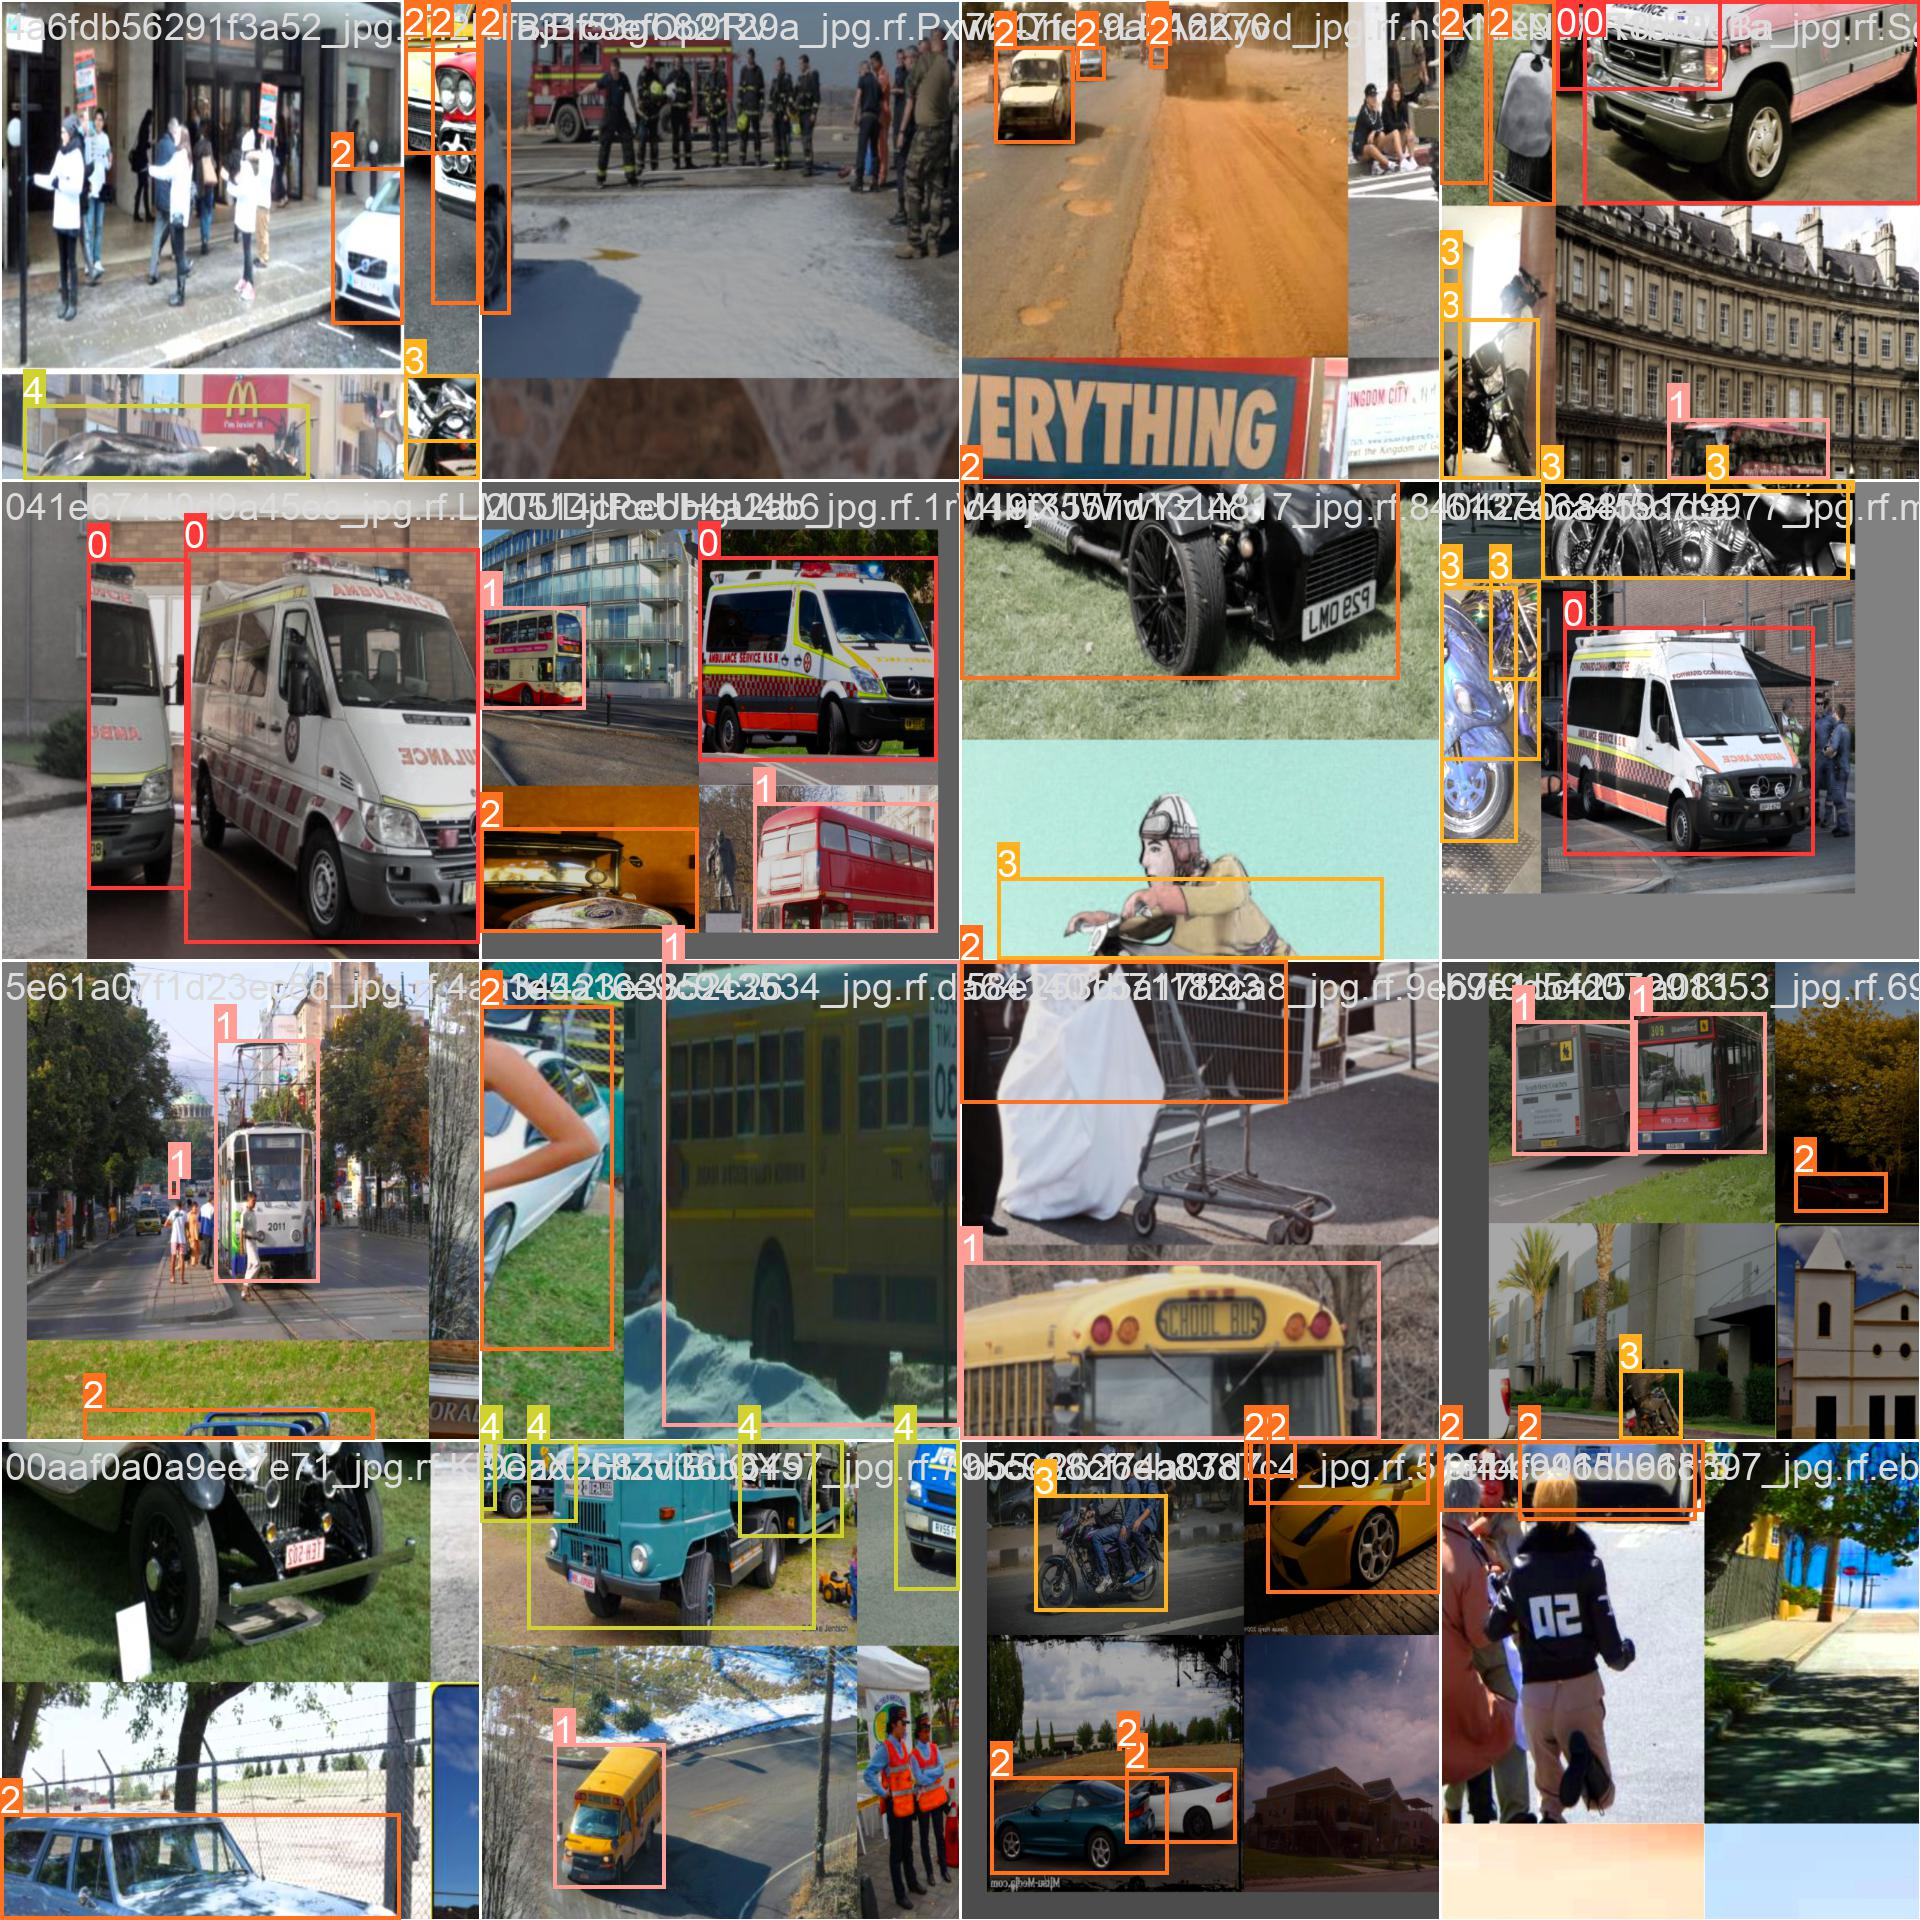

In [9]:
runs_directory = "parking_lot/yolov5s_size640_epochs20_batch32_small"

display(
    Image(
        filename=f"{runs_directory}/train_batch0.jpg"
    )
)

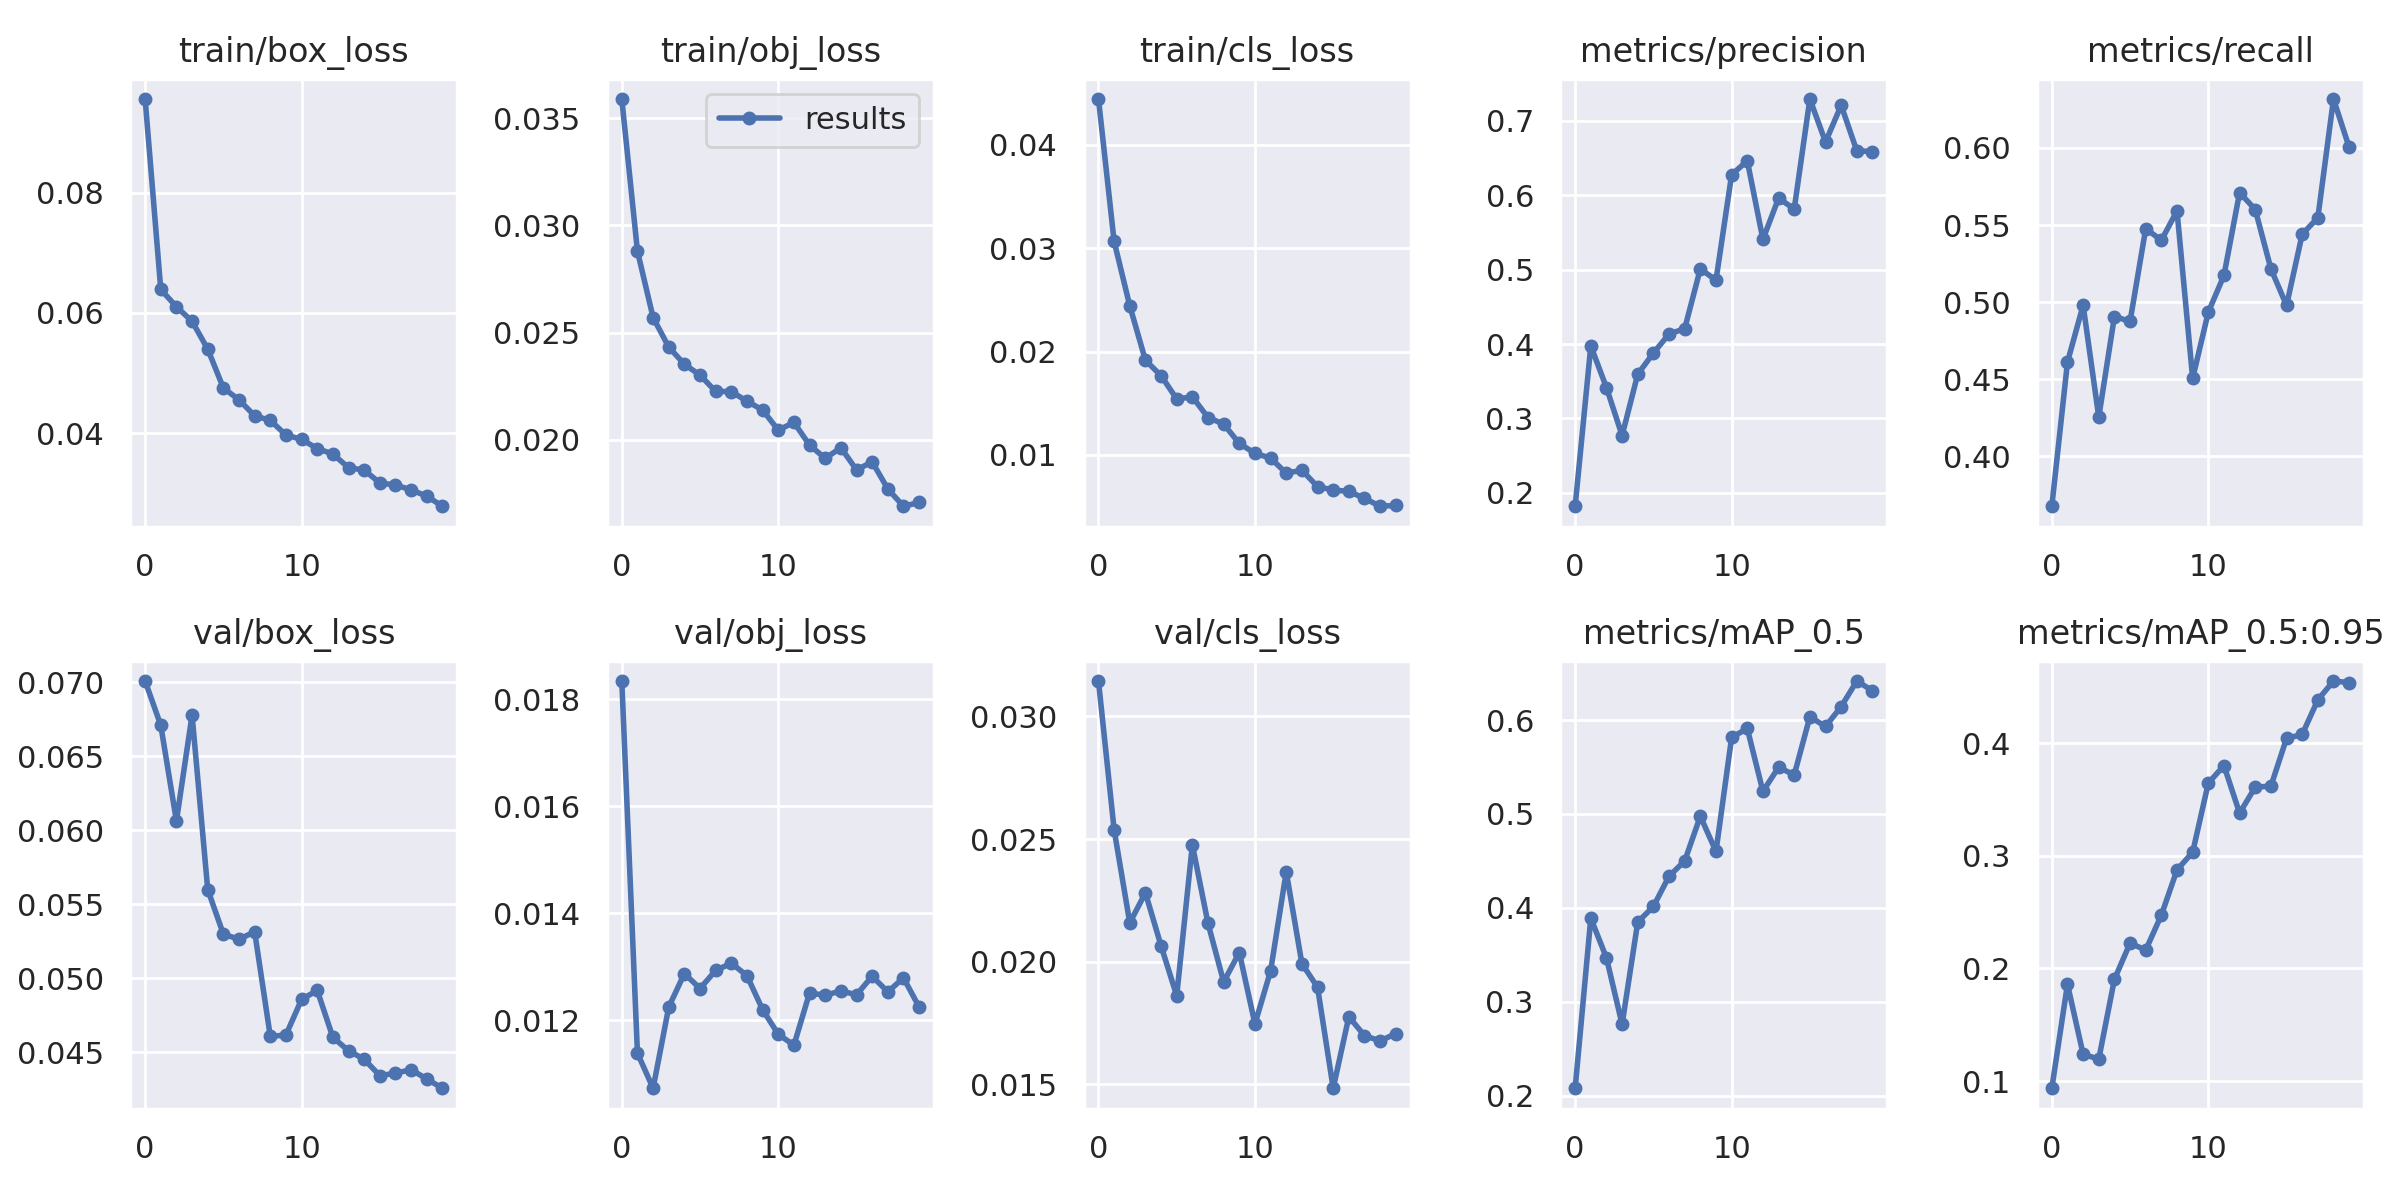

In [10]:
display(
    Image(
        filename=f"{runs_directory}/results.png"
    )
)

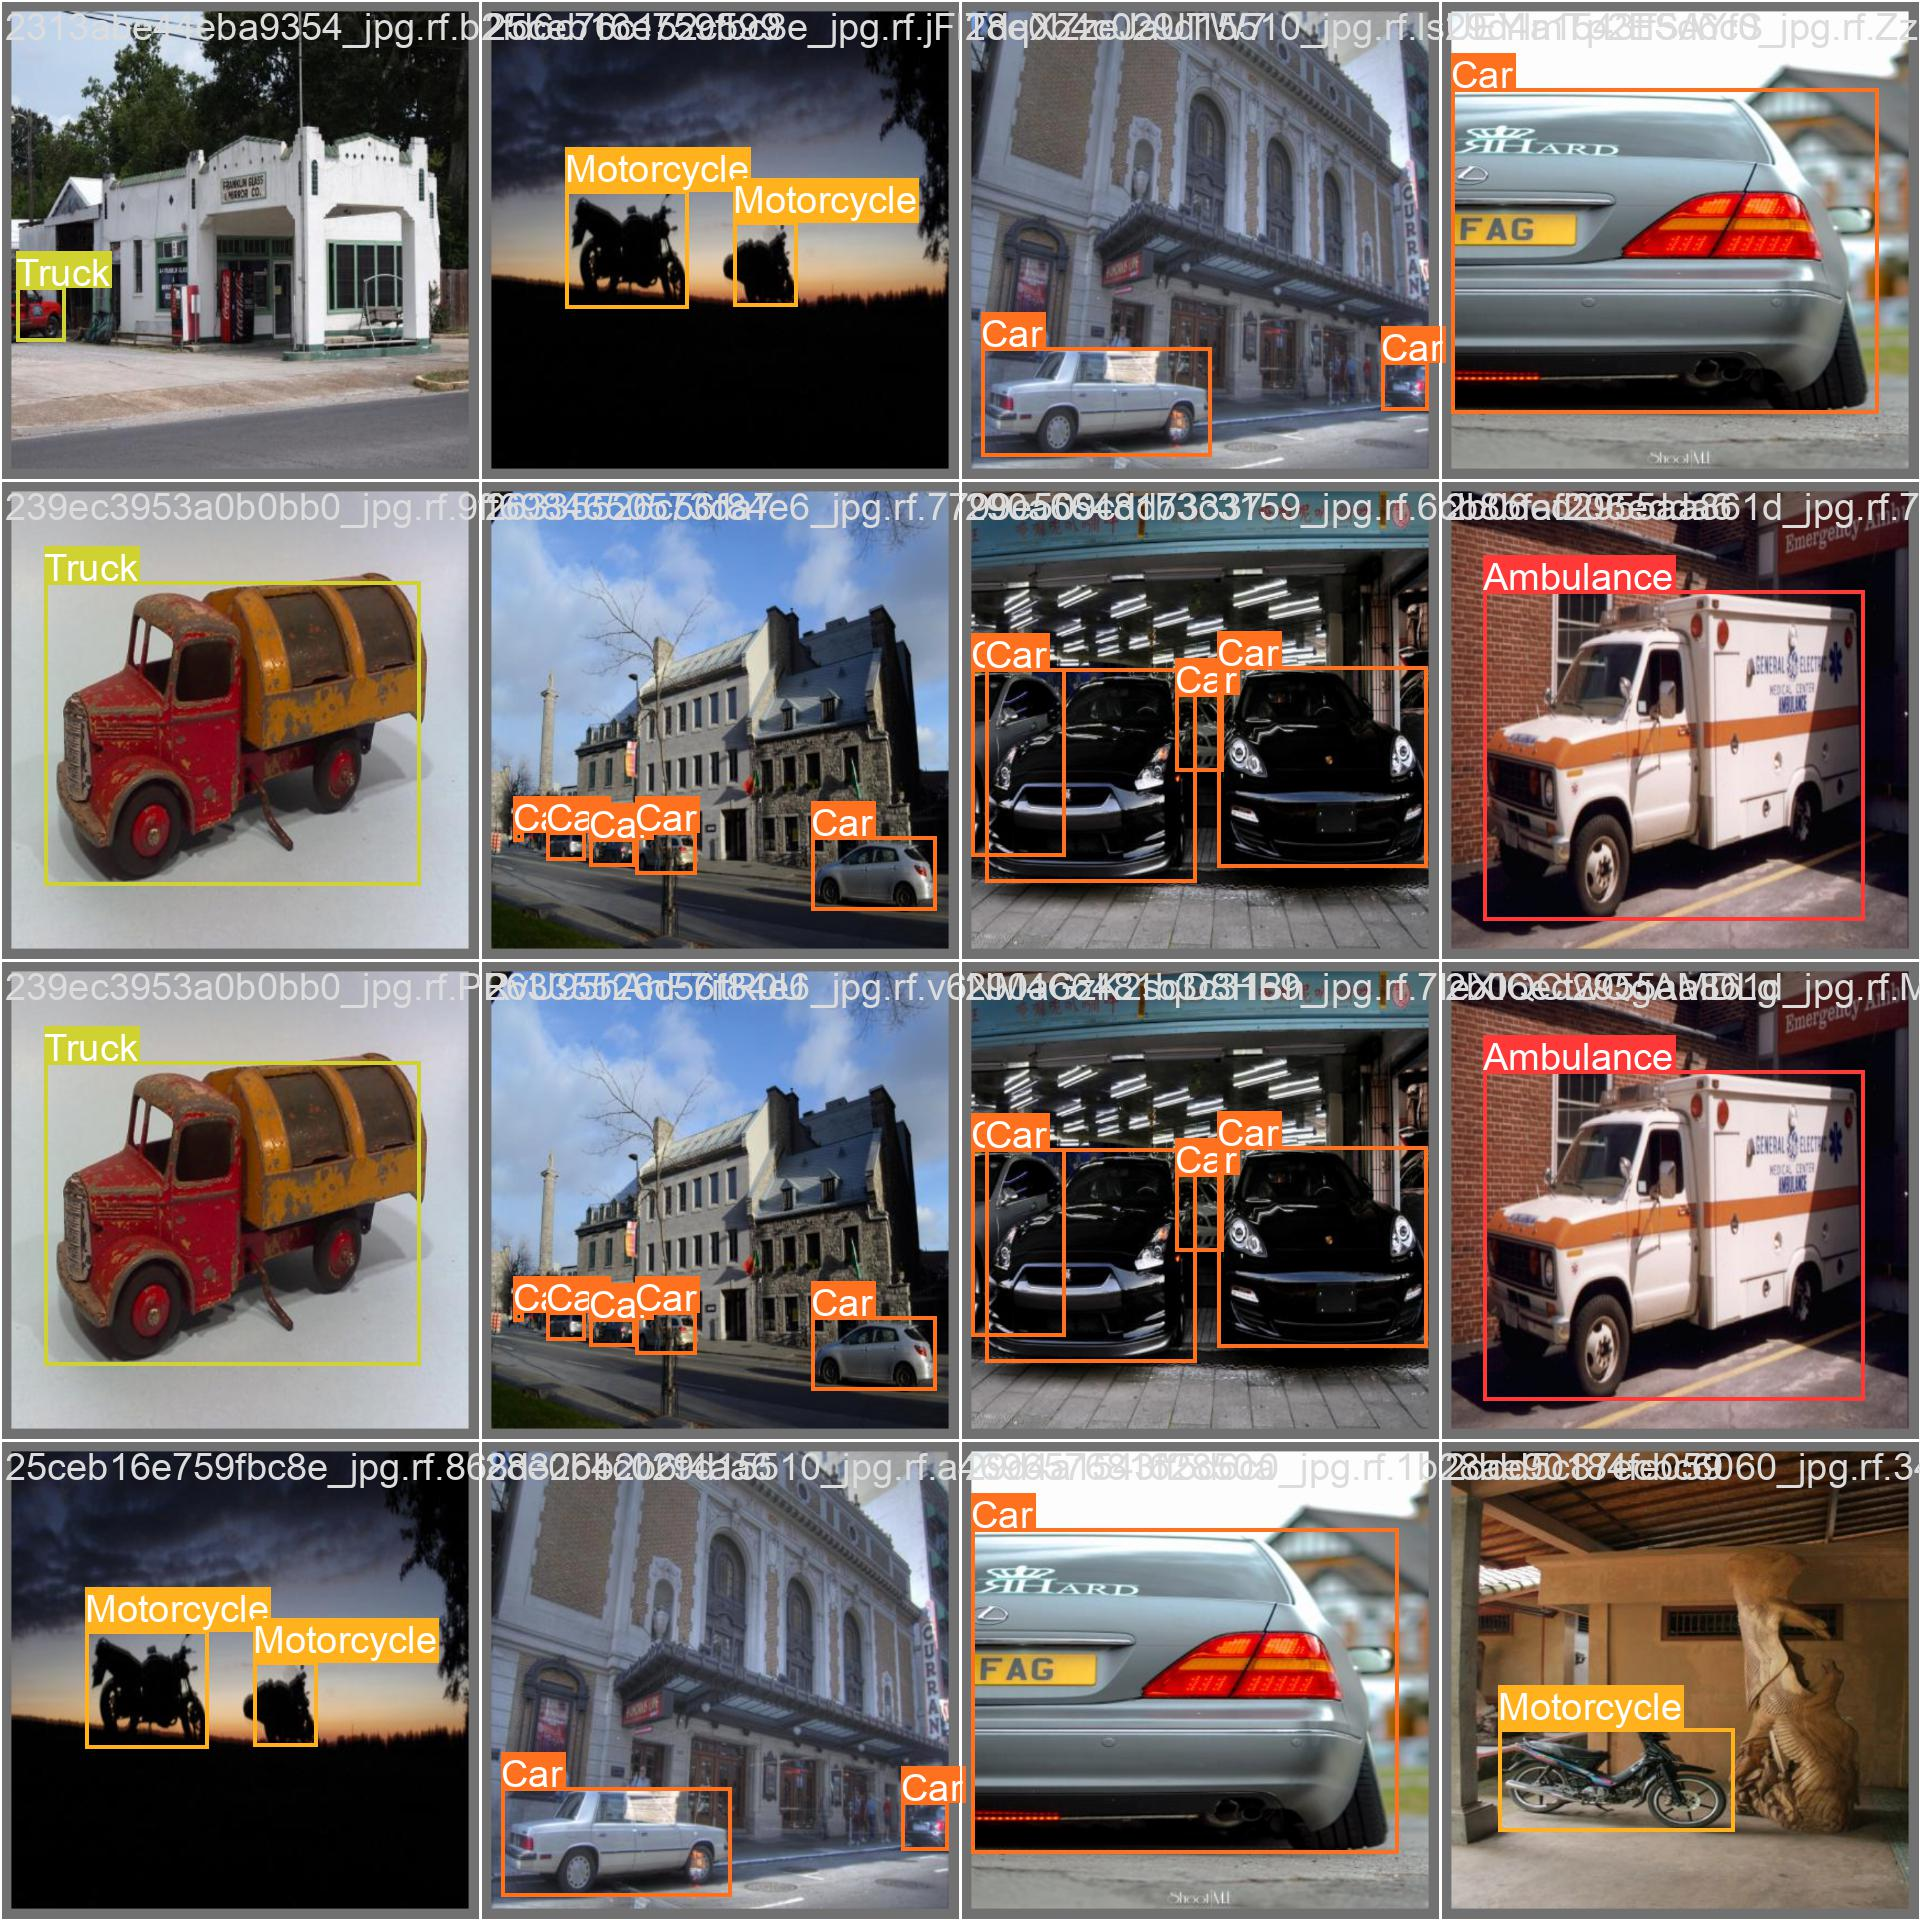

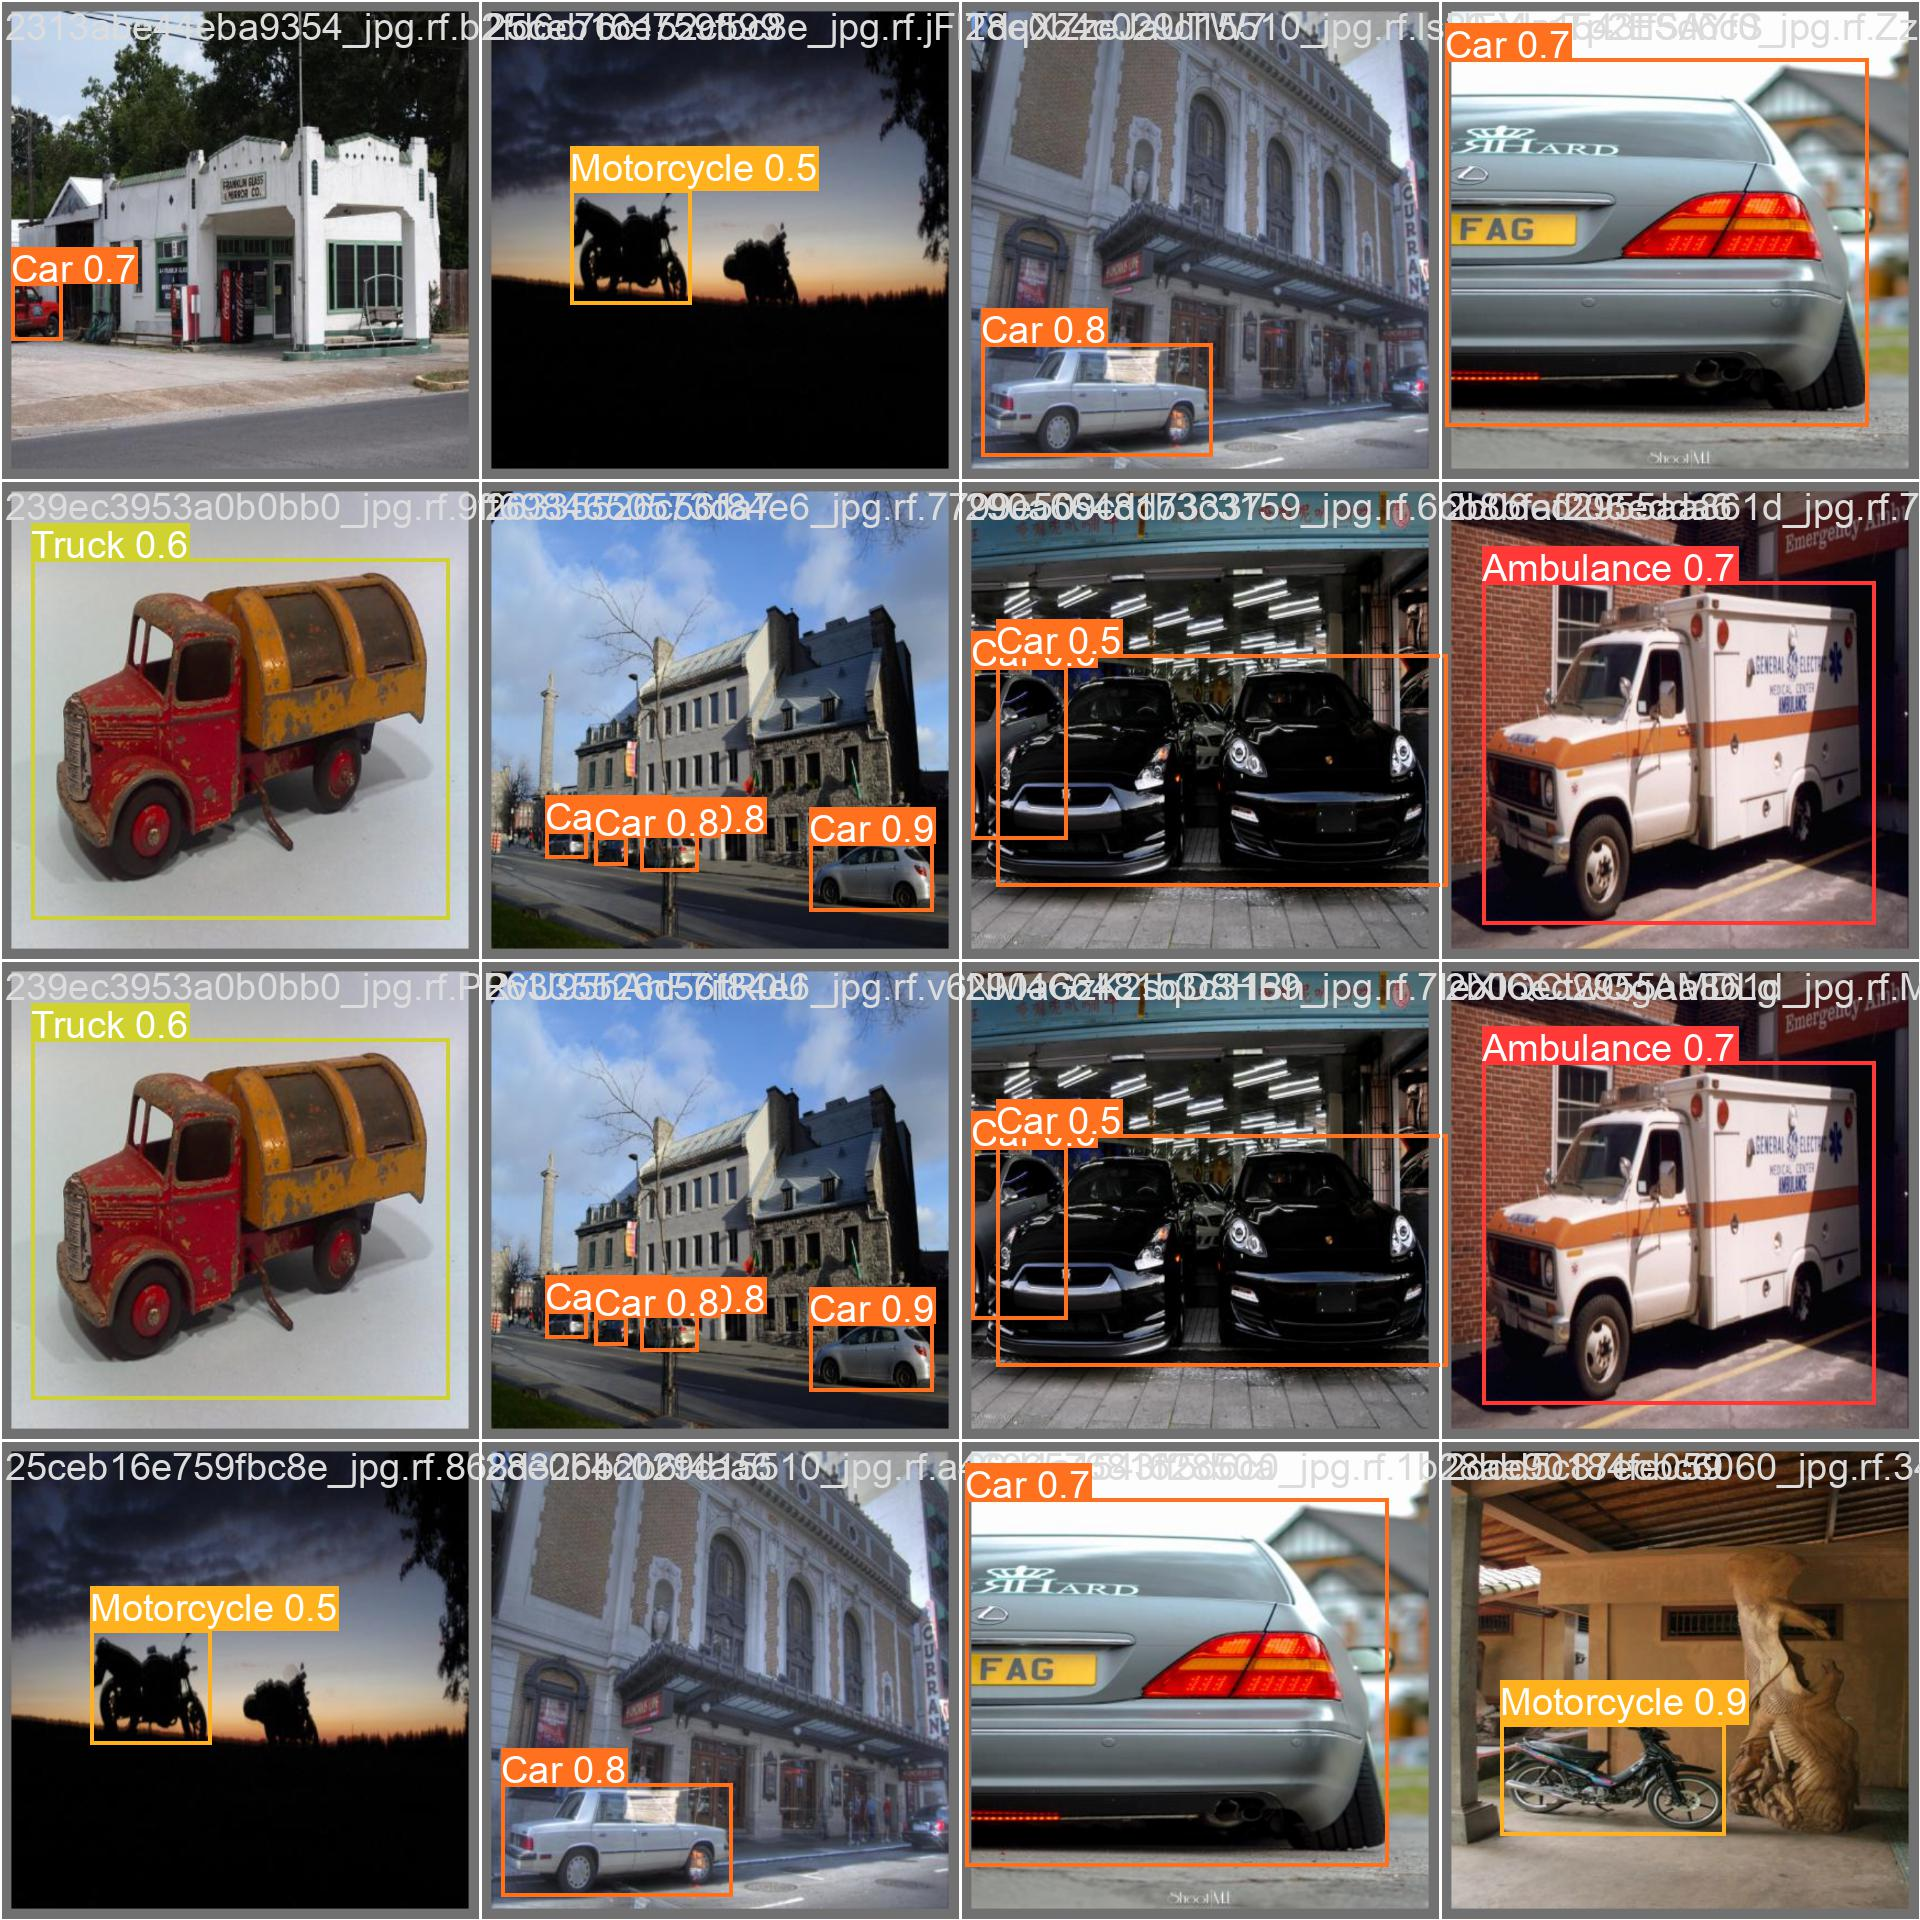

In [11]:
display(
    Image(
        filename=f"{runs_directory}/val_batch2_labels.jpg"
    )
)
print("\n")
display(
    Image(
        filename=f"{runs_directory}/val_batch2_pred.jpg"
    )
)

### Run Inference  With Trained Weights

Run inference with a pretrained pytorch checkpoint on contents of `test/images` folder inside the `vehicles_open_image` dataset.

In [12]:
!python detect.py --weights {runs_directory}/weights/best.pt\
                  --source ../vehicles_open_image/test/images\
                  --conf 0.1\
                  --data ../vehicles_open_image/data.yaml\
                  --project {PROJECT}/{RUN_NAME}\
                  --name test_data_detections

detect: weights=['parking_lot/yolov5s_size640_epochs20_batch32_small/weights/best.pt'], source=../vehicles_open_image/test/images, data=../vehicles_open_image/data.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=parking_lot/yolov5s_size640_epochs20_batch32_small, name=test_data_detections, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/126 /content/vehicles_open_image/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 640x640 1 Ambu

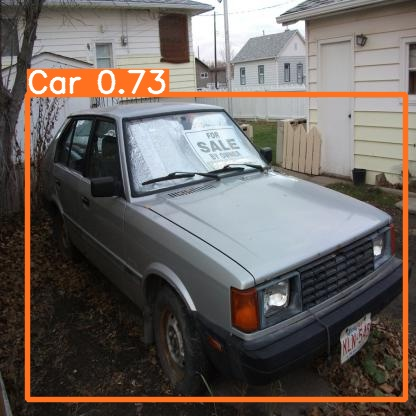

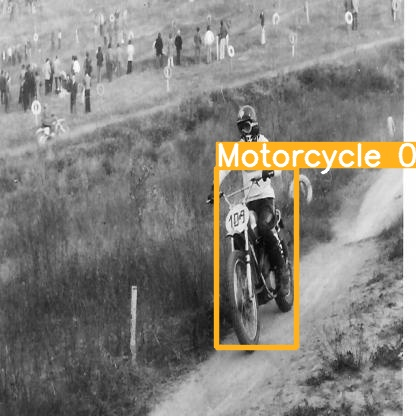

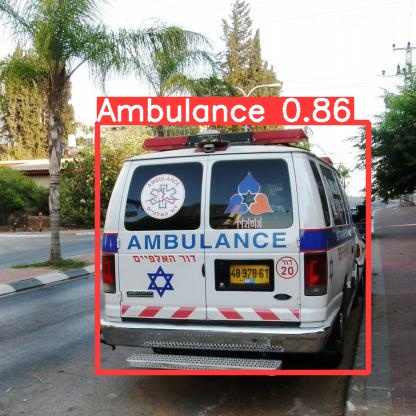

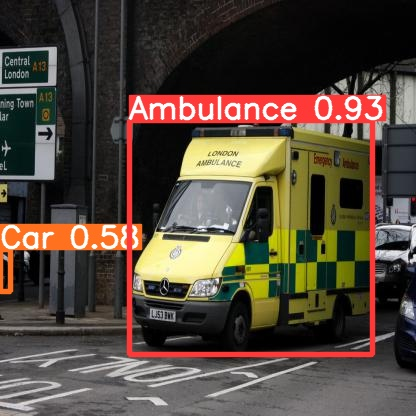

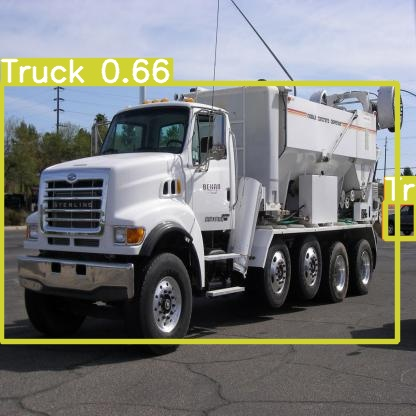

In [13]:
#display inference on few test images
for imageName in glob.glob(runs_directory+'/test_data_detections/*.jpg')[60:65]:
    display(Image(filename=imageName))
    print("\n")

### Fine-tuning with 10 layers freezed

In [14]:
!python train.py --img {SIZE}\
                --batch {BATCH_SIZE}\
                --epochs {EPOCHS}\
                --data ../vehicles_open_image/data.yaml\
                --weights {MODEL}.pt\
                --workers {WORKERS}\
                --project {PROJECT}\
                --name freeze_layers\
                --freeze 0 1 2 3 4 5 6 7 8 9 10 

train: weights=yolov5s.pt, cfg=, data=../vehicles_open_image/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=parking_lot, name=freeze_layers, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

### Performance Metric of Freeze Model

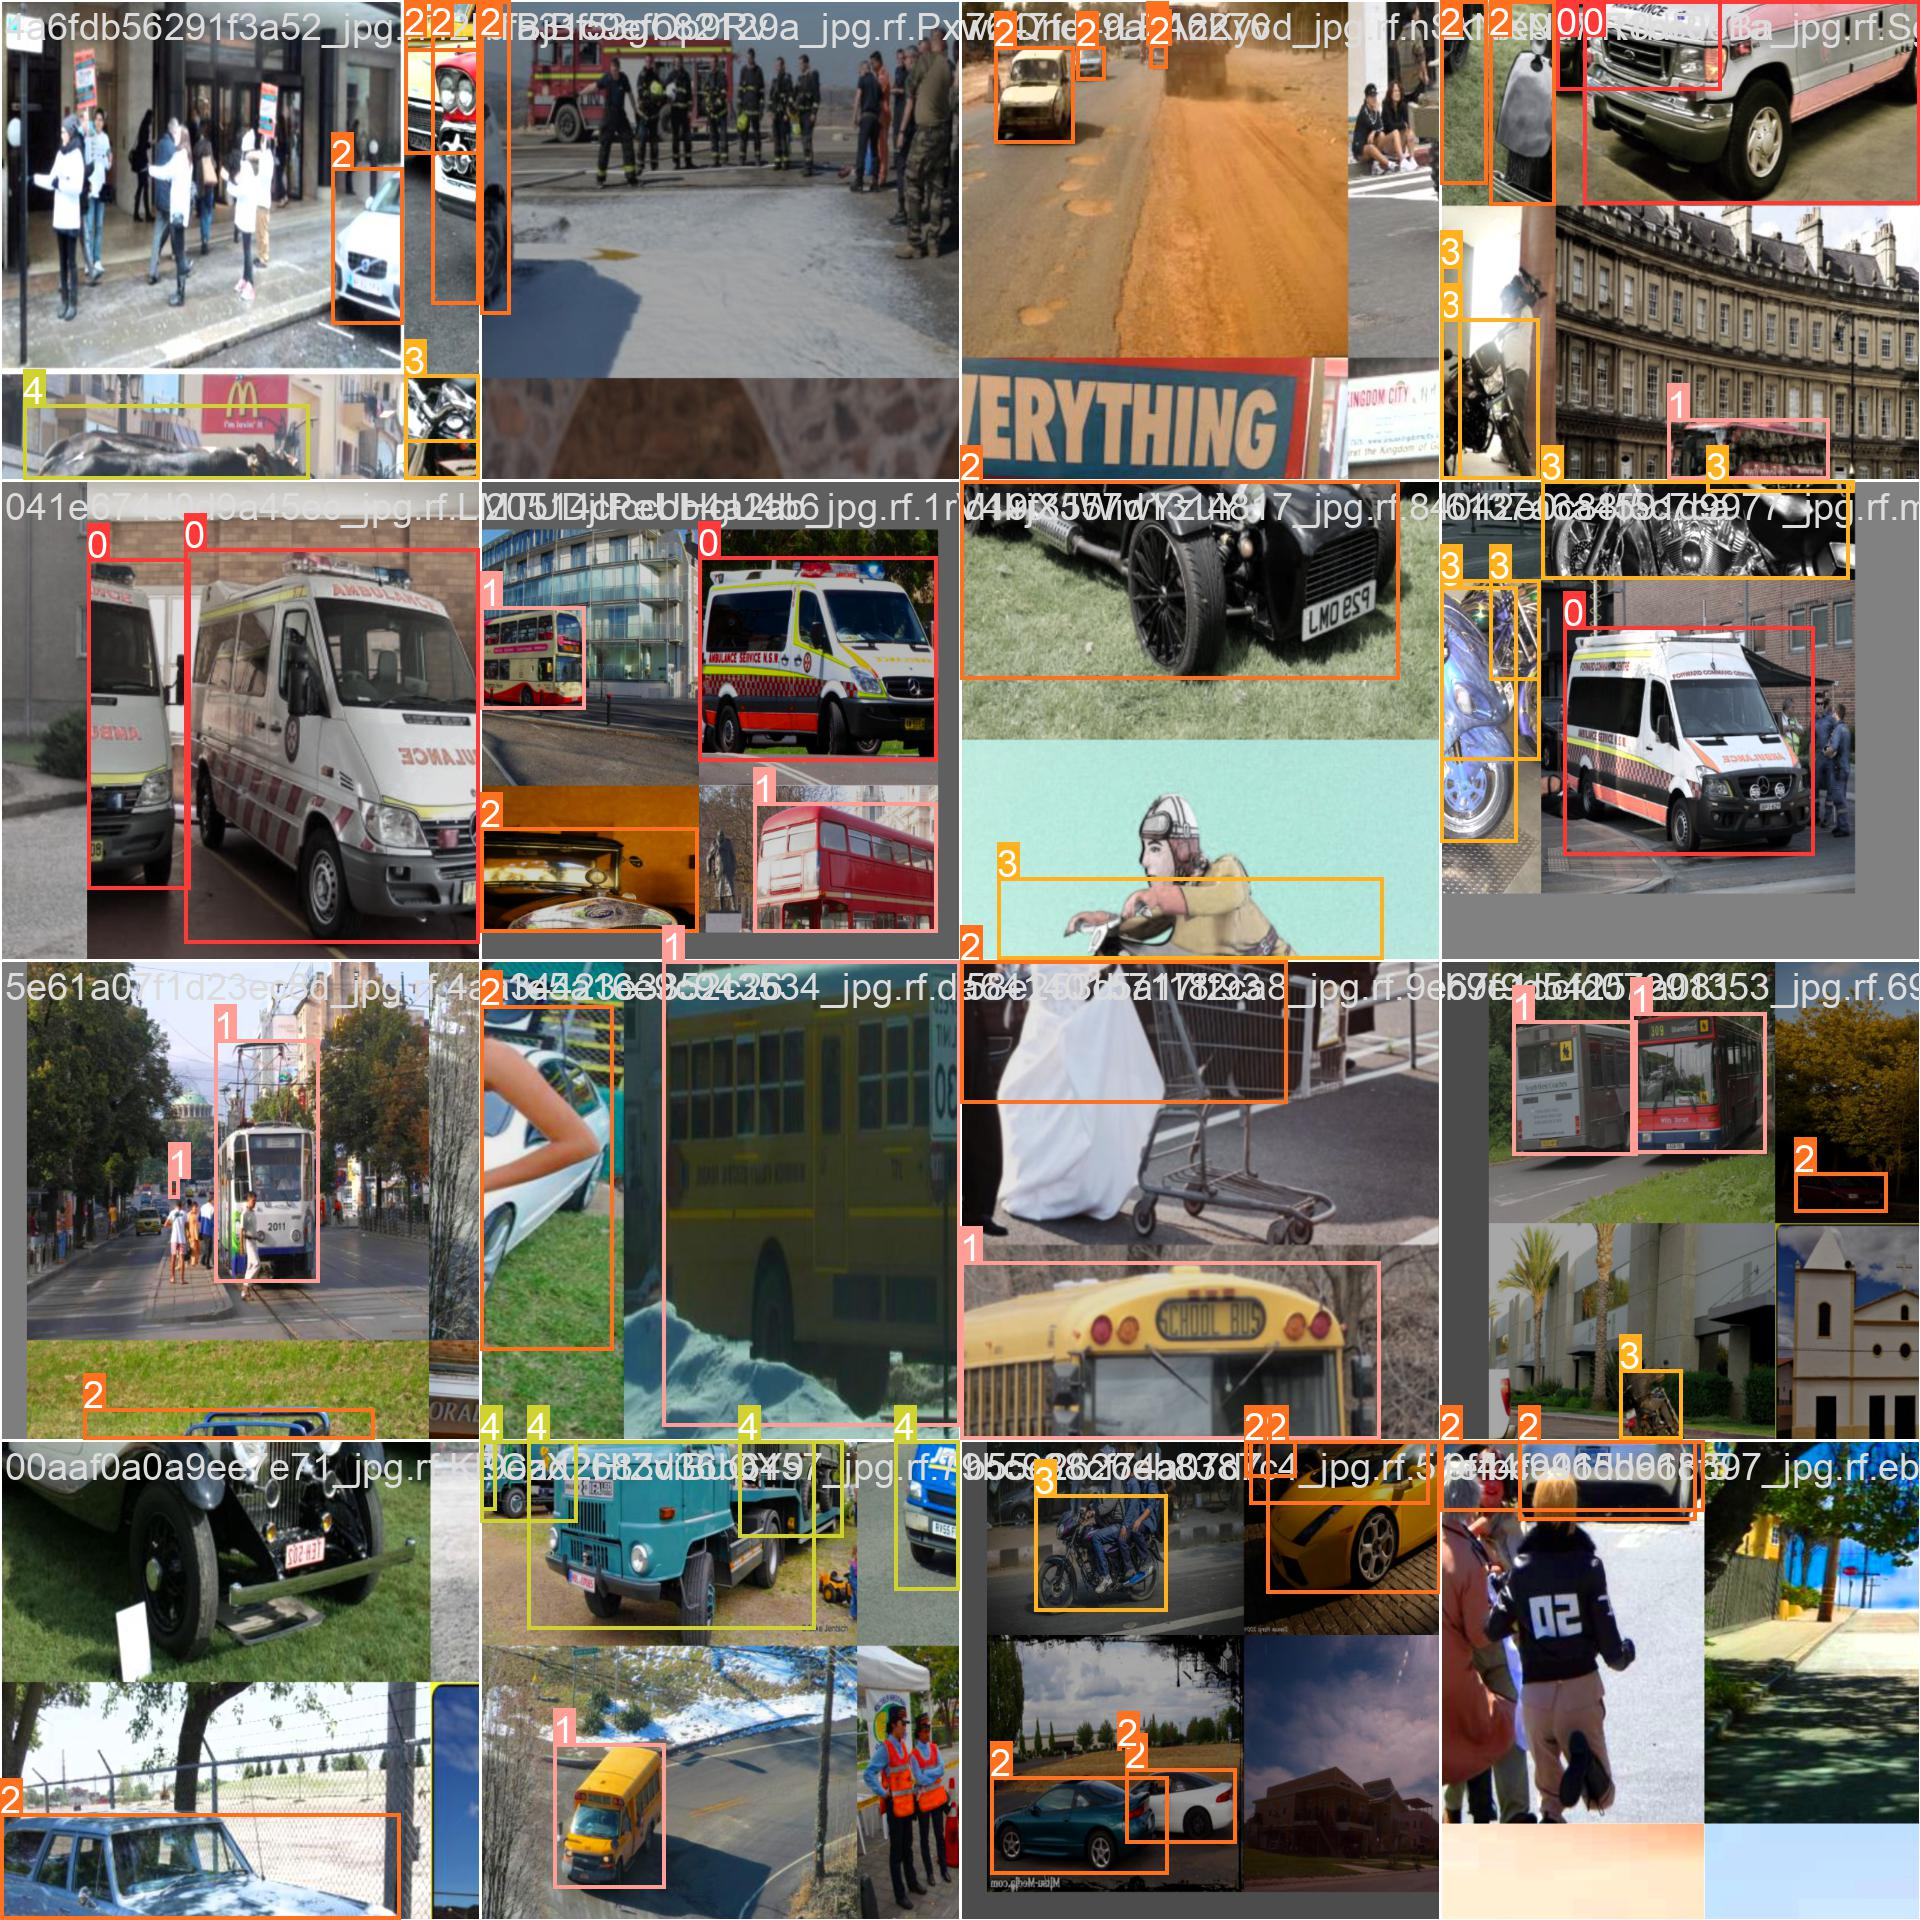

In [15]:
runs_directory = "parking_lot/freeze_layers"

display(
    Image(
        filename=f"{runs_directory}/train_batch0.jpg"
    )
)

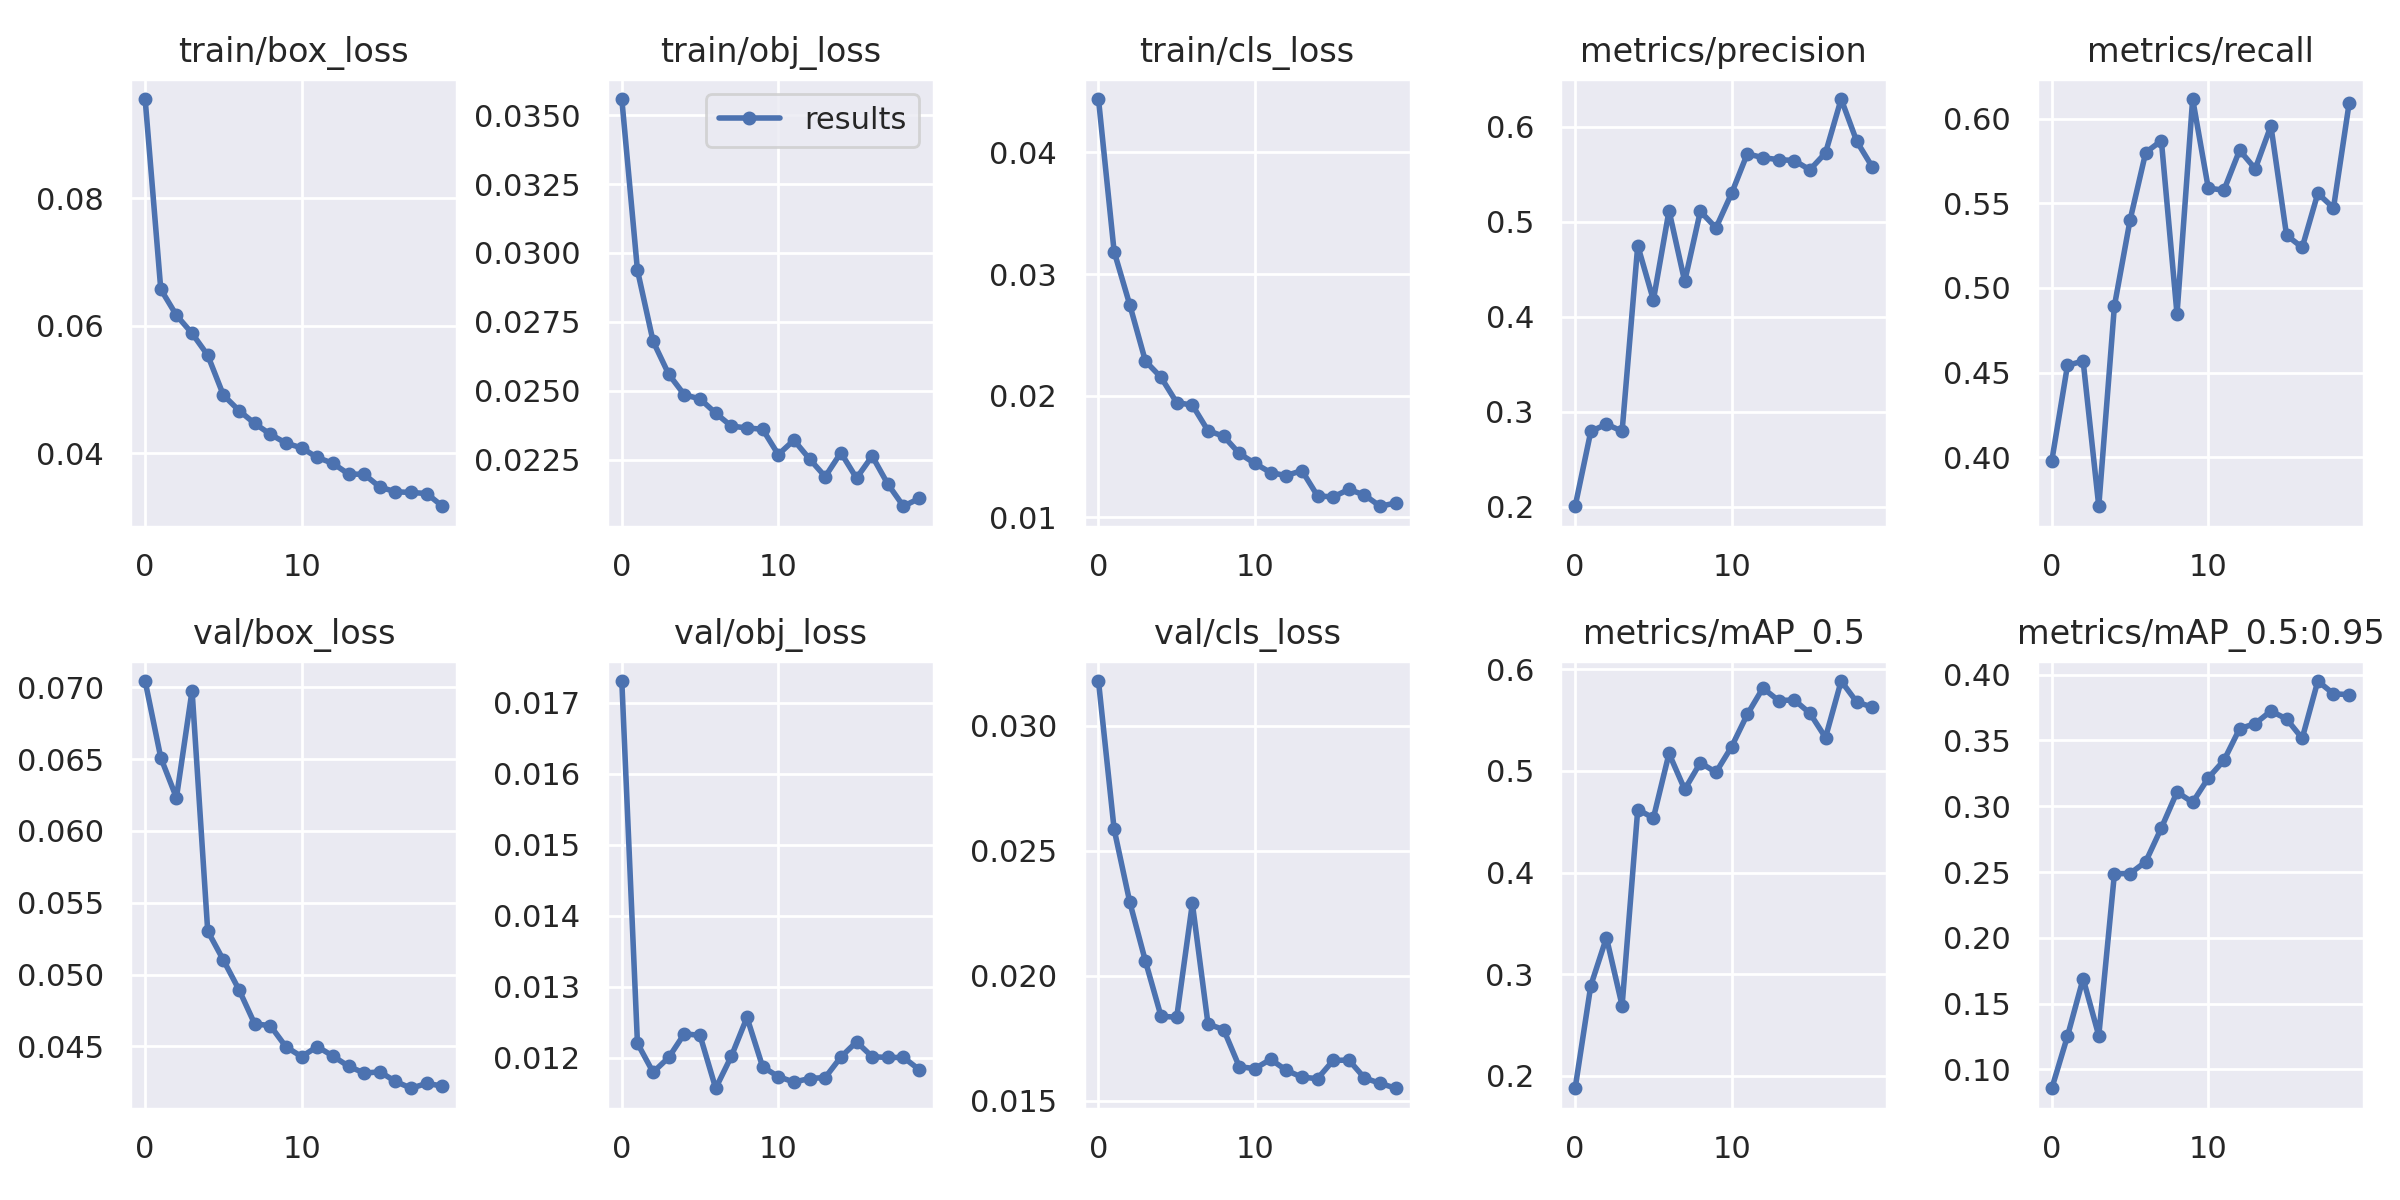

In [16]:
display(
    Image(
        filename=f"{runs_directory}/results.png"
    )
)

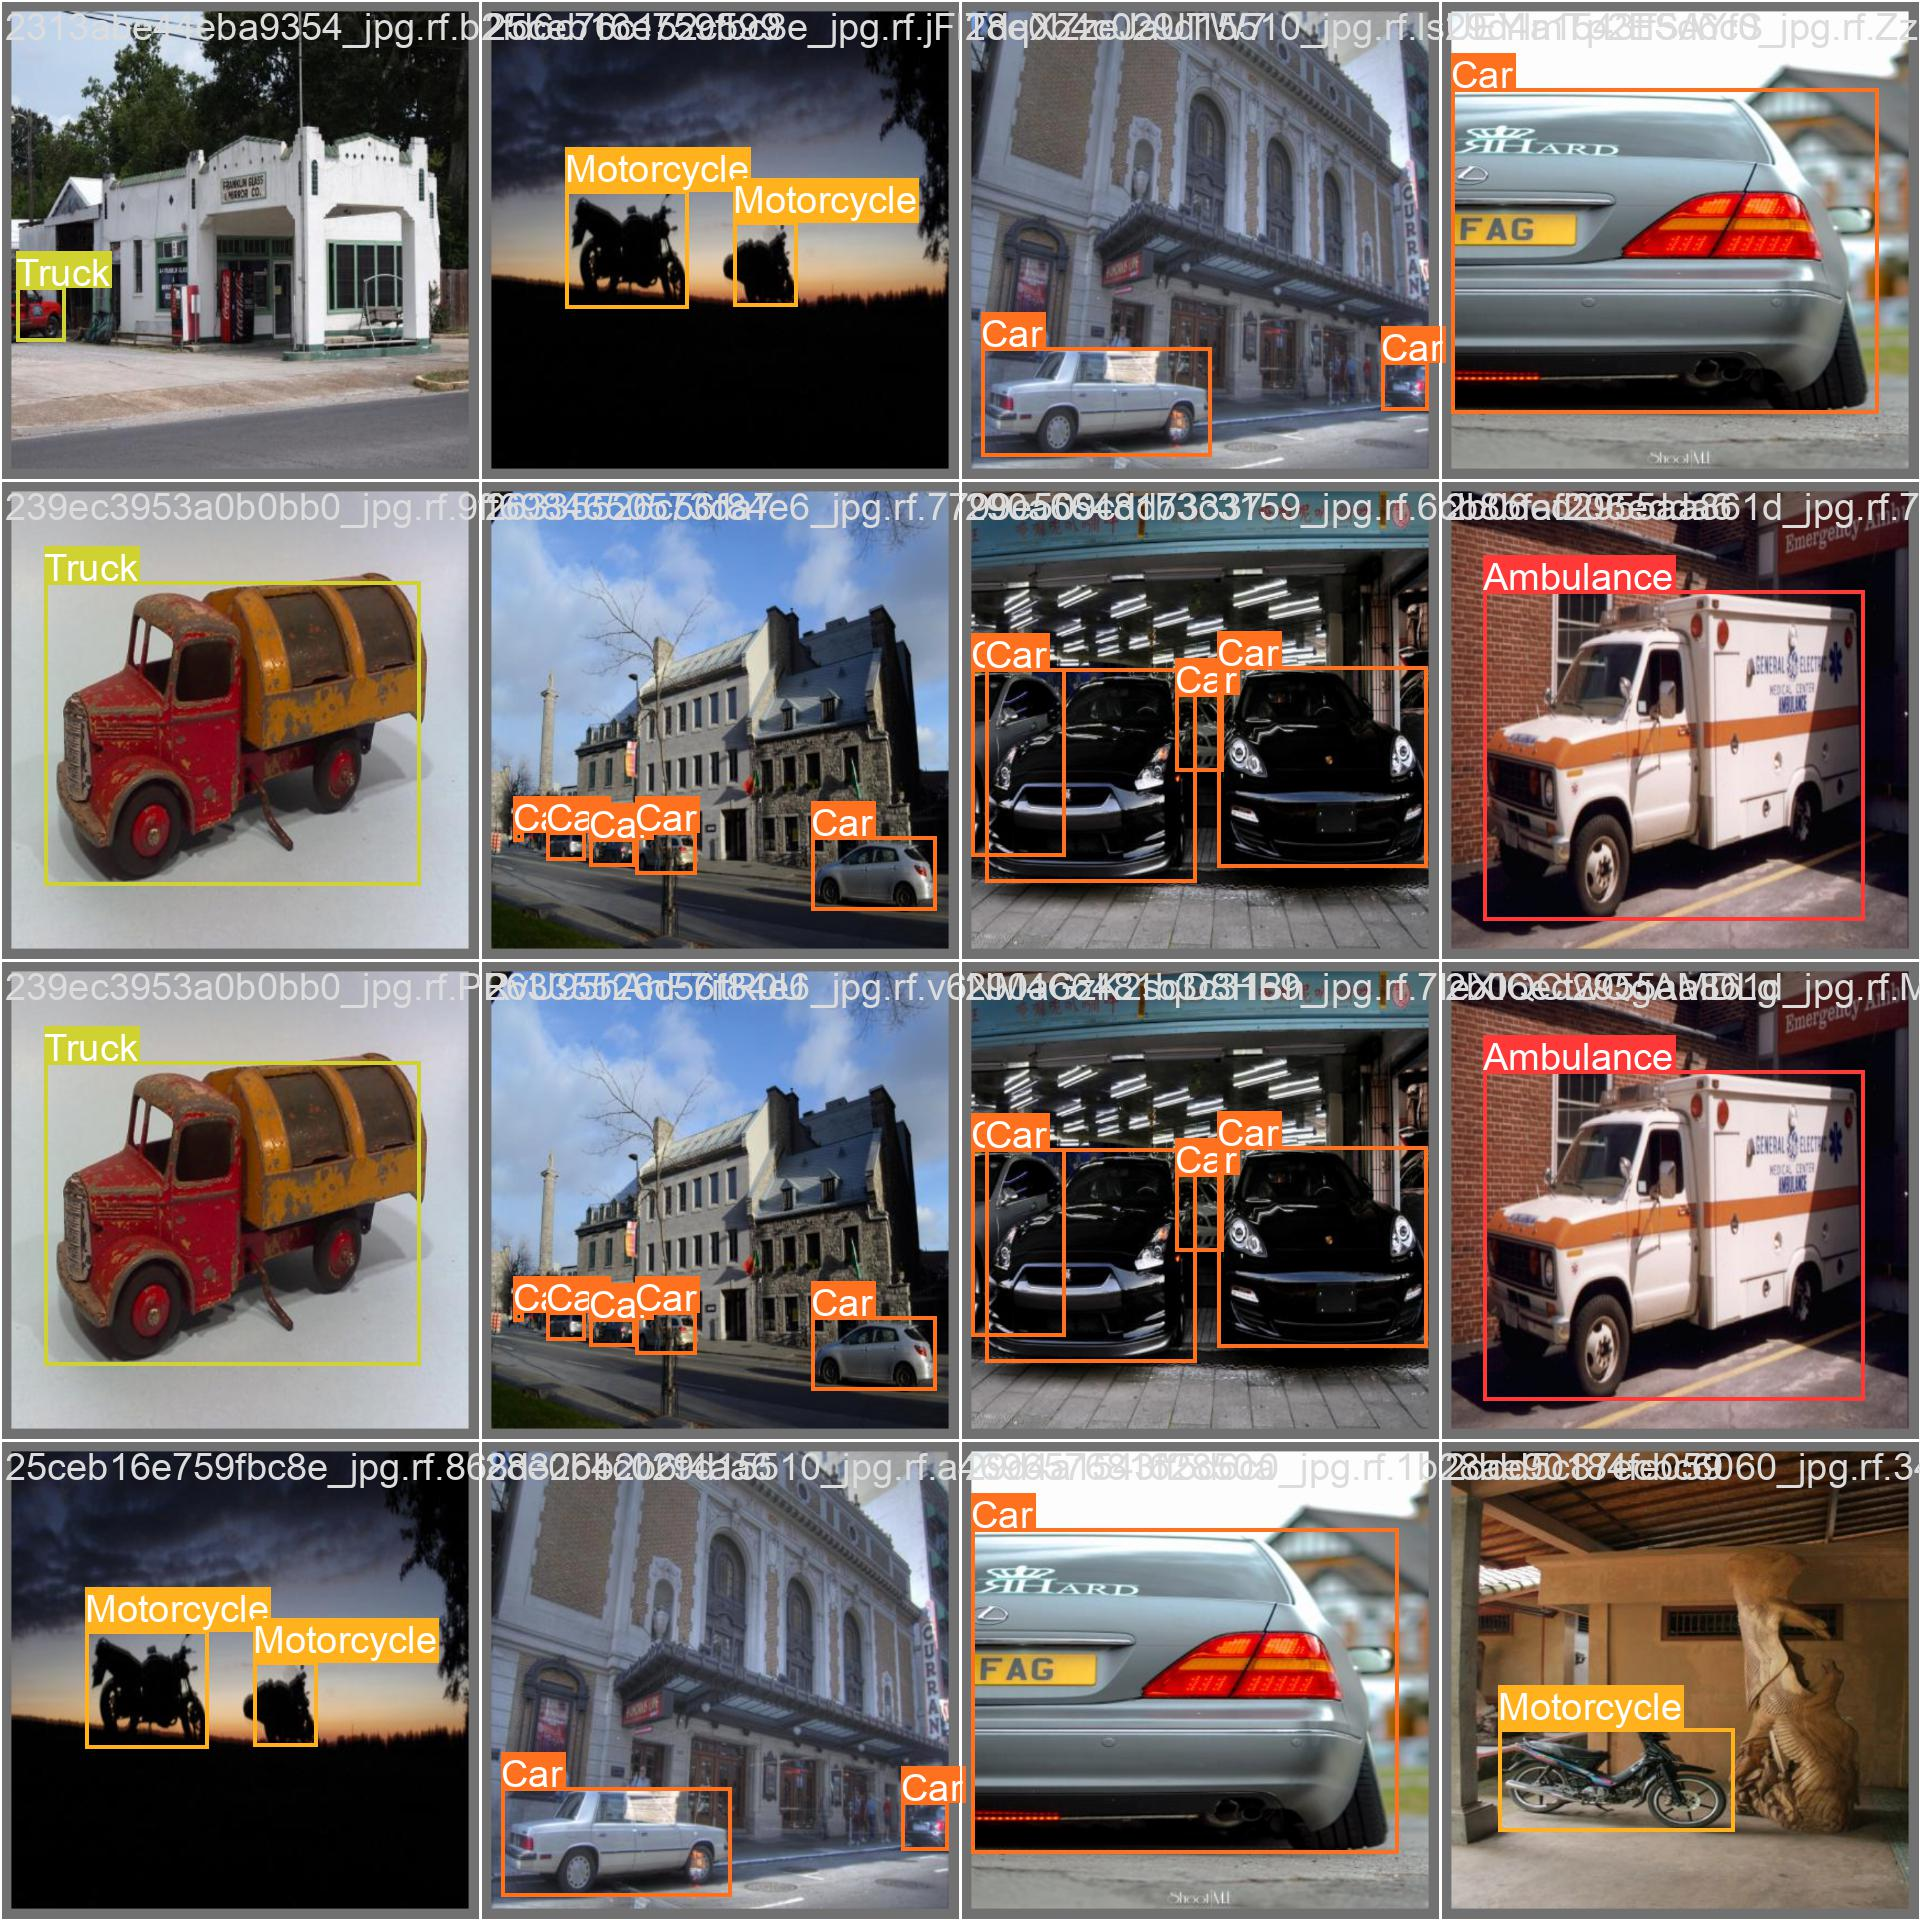

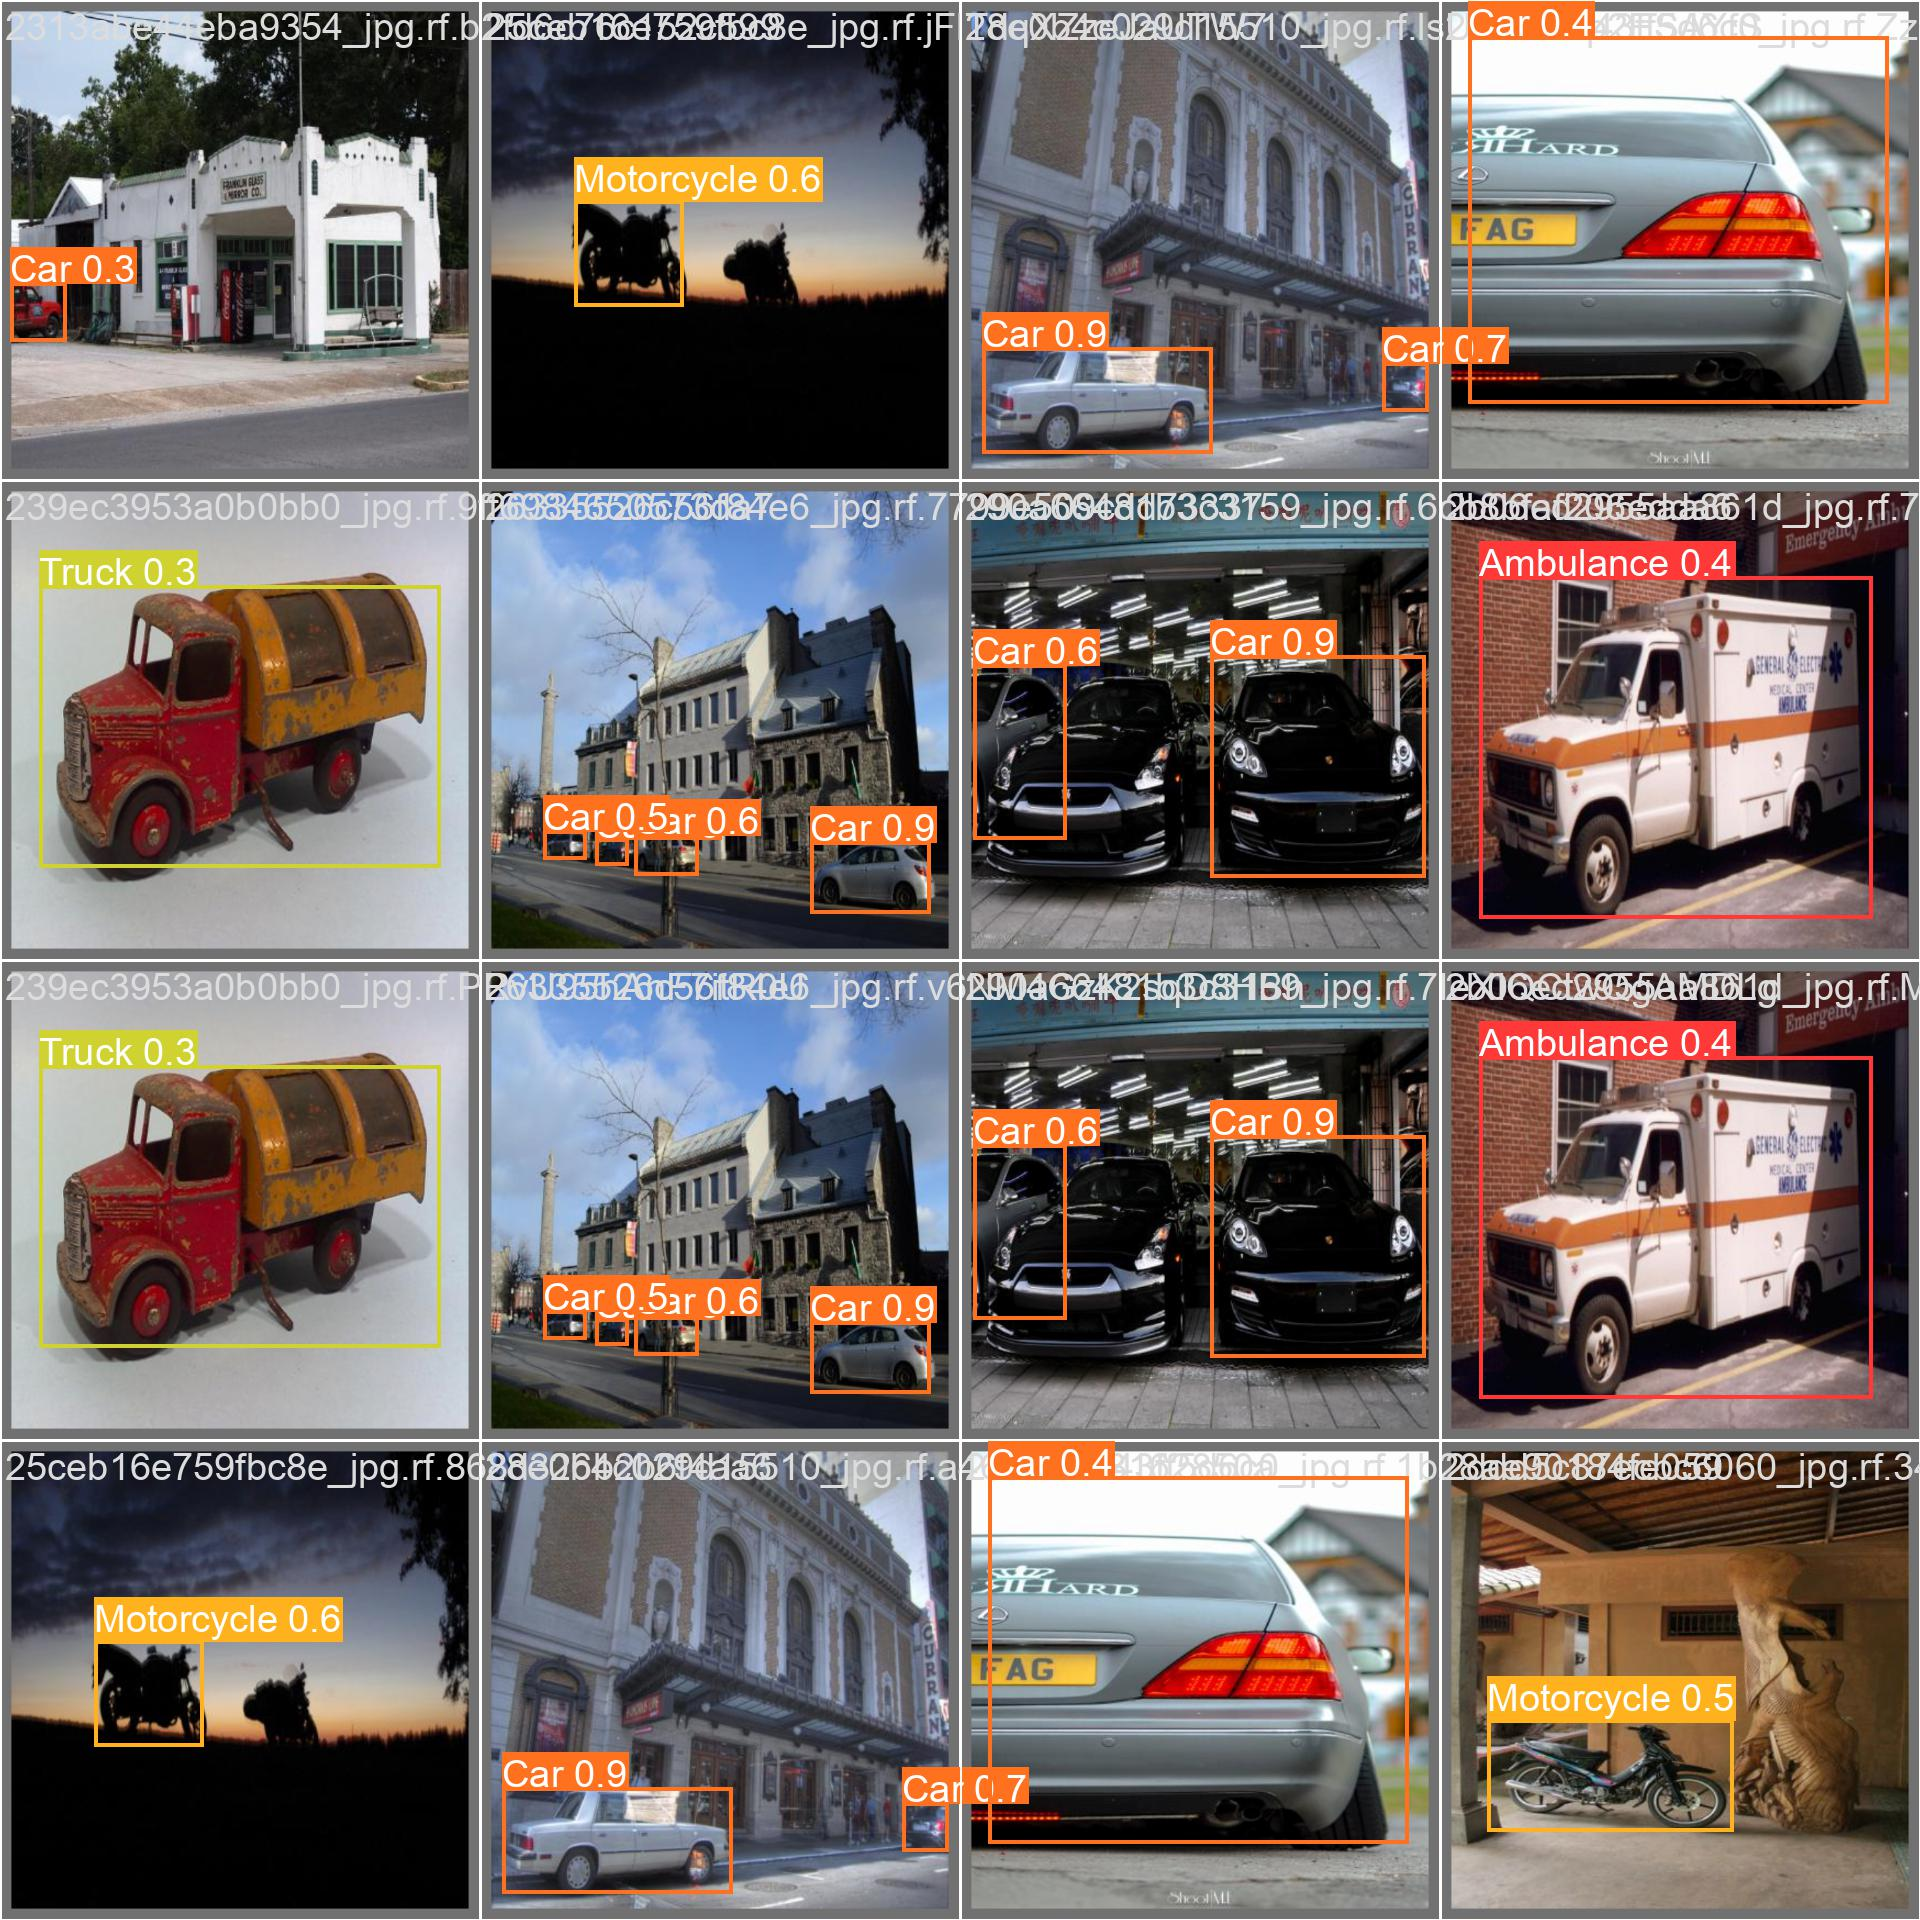

In [17]:
display(
    Image(
        filename=f"{runs_directory}/val_batch2_labels.jpg"
    )
)
print('\n')
display(
    Image(
        filename=f"{runs_directory}/val_batch2_pred.jpg"
    )
)

### Run Inference  With Trained Weights

Run inference with a pretrained pytorch checkpoint on contents of `test/images` folder inside the `vehicles_open_image` dataset.

In [18]:
!python detect.py --weights {runs_directory}/weights/best.pt\
                  --source ../vehicles_open_image/test/images\
                  --conf 0.1\
                  --data ../vehicles_open_image/data.yaml\
                  --project {runs_directory}\
                  --name test_data_detections

detect: weights=['parking_lot/freeze_layers/weights/best.pt'], source=../vehicles_open_image/test/images, data=../vehicles_open_image/data.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=parking_lot/freeze_layers, name=test_data_detections, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/126 /content/vehicles_open_image/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 640x640 1 Ambulance, 11.5ms
image 2/126 /content/vehicles_open_i

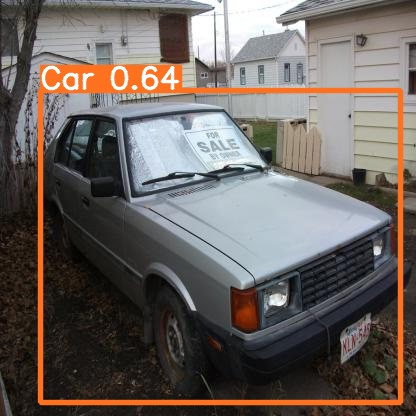

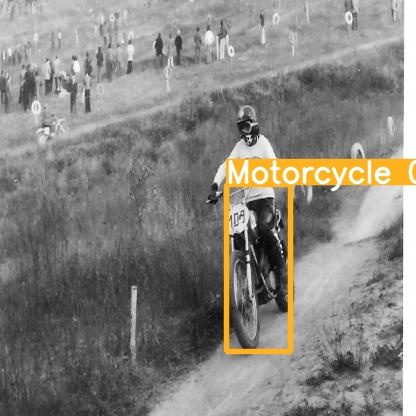

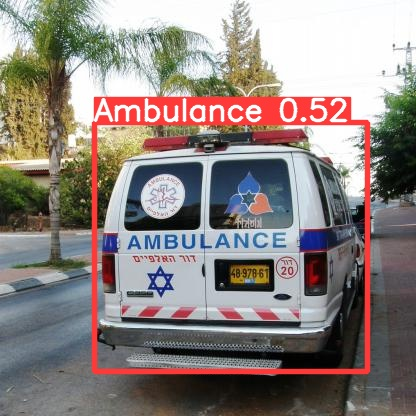

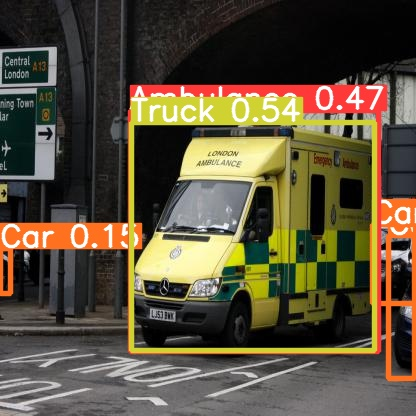

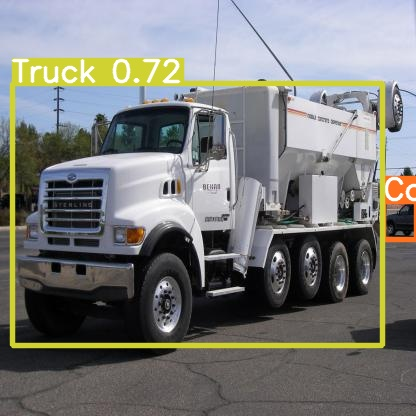

In [19]:
#display inference on few test images
for imageName in glob.glob(f"{runs_directory}//test_data_detections/*.jpg")[60:65]: 
    display(Image(filename=imageName))
    print("\n")